## Coding Exercise #0311

<img src="https://miro.medium.com/max/1000/0*08KrYhXpVQdUXWrX" width="400" height="240">
<img src="https://miro.medium.com/max/1380/1*AFqQio7ZB91FZvFtuYAn-w.png" width="400" height="240">
<img src="https://miro.medium.com/max/1713/1*6HVomcqW7BWuZ2vvGOEptw.png" width="400" height="240">


You can learn more [here](https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200)
or [here](https://www.analytixlabs.co.in/blog/introduction-support-vector-machine-algorithm/) 
and maybe [here too](https://www.kdnuggets.com/2022/08/support-vector-machines-intuitive-approach.html)

### 1. Classification with SVM:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.datasets import load_iris
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### 1.1. Read in data:

In [2]:
# Load data.
data = load_iris()

In [4]:
# Explanatory variables.
X = data.data
columns = data.feature_names
print(columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# Response variable.
Y = data.target
labels = data.target_names
print(labels)

['setosa' 'versicolor' 'virginica']


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 1.2. SVM hyperparameter optimization (RBF kernel):

C     : Penalty parameter. <br>
gamma : kernel parameter ($\gamma$).

In [9]:
#Grid sreach with RBF Kernel
C_grid = 0.02*np.arange(1,20)
gamma_grid = 0.02*np.arange(1,50)
parameters = {'C':C_grid,'gamma':gamma_grid}
gridCV = GridSearchCV(SVC(), param_grid=parameters)            # "n_jobs = -1" means "use all the CPU cores".

#Train
model= gridCV.fit(X_train, Y_train)
#Get the best parameters
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

In [10]:
print("SVM best C : " + str(best_C))
print("SVM best gamma : " + str(best_gamma))

SVM best C : 0.12
SVM best gamma : 0.86


In [12]:
#Now that we got the best parameters, lets try them !
SVM_rbf = SVC(C=0.12, gamma=0.86)

#Train
model=SVM_rbf.fit(X_train, Y_train)

#Predict
Y_pred = model.predict(X_test)

#Accuracy
print( f"SVM best accuracy : {metrics.accuracy_score(Y_test, Y_pred)}" )

SVM best accuracy : 0.9777777777777777


#### 1.3. SVM hyperparameter optimization (Polynomial kernel): kernel):

In [14]:
#Grid Search with Polynomial
C_grid = 0.0001*np.arange(1,30)
gamma_grid = 0.01*np.arange(1,30)
parameters ={'C':C_grid,'gamma':gamma_grid}
gridCV =  GridSearchCV(SVC(kernel='poly'), param_grid=parameters)           # "n_jobs = -1" means "use all the CPU cores".

#Train
model=gridCV.fit(X_train,Y_train)
#Get the best parameters
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

In [15]:
print("SVM best C : " + str(best_C))
print("SVM best gamma : " + str(best_gamma))

SVM best C : 0.0018000000000000002
SVM best gamma : 0.29


In [16]:
#Now that we got the best parameters, lets try them !
SVM_ply = SVC(kernel='poly', C=best_C, gamma=best_gamma)

#Train
model=SVM_ply.fit(X_train, Y_train)
#Predict
Y_pred = model.predict(X_test)

#Accuracy
print( f"SVM best accuracy : {metrics.accuracy_score(Y_test, Y_pred)}" )

SVM best accuracy : 1.0


#### 1.4. SVM hyperparameter optimization (Linear kernel): kernel):

In [18]:
#Grid Search with linear
C_grid = 0.0001*np.arange(1,30)
gamma_grid = 0.01*np.arange(1,30)
parameters ={'C':C_grid,'gamma':gamma_grid}
gridCV =  GridSearchCV(SVC(kernel='linear'), param_grid=parameters)          # "n_jobs = -1" means "use all the CPU cores".

#Train
model=gridCV.fit(X_train,Y_train)
#Get the best parameters
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

In [19]:
print("SVM best C : " + str(best_C))
print("SVM best gamma : " + str(best_gamma))

SVM best C : 0.0016
SVM best gamma : 0.01


In [21]:
#Now that we got the best parameters, lets try them !
SVM_lin=SVC(kernel='linear', C=best_C, gamma=best_gamma)

#Train
model=SVM_lin.fit(X_train, Y_train)
#Predict
Y_pred = model.predict(X_test)

#Accuracy
print( f"SVM best accuracy : {metrics.accuracy_score(Y_test, Y_pred)}" )

SVM best accuracy : 0.6222222222222222


**Make a conclusion**

#### 1.5. Lets plot:

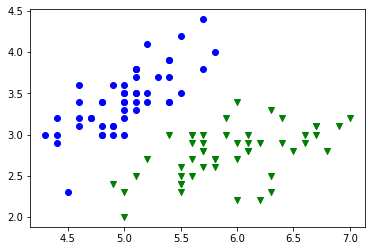

In [22]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='green', marker='v', label='Versicolor')


In [ ]:
#Bonus : Plot the different decision boundaries if you can